In [28]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
dt = pd.read_csv('taxi_trip_pricing.csv')
dt.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [5]:
dt.nunique()

Trip_Distance_km         867
Time_of_Day                4
Day_of_Week                2
Passenger_Count            4
Traffic_Conditions         3
Weather                    3
Base_Fare                290
Per_Km_Rate              150
Per_Minute_Rate           41
Trip_Duration_Minutes    917
Trip_Price               951
dtype: int64

In [7]:
dt.isnull().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [11]:
#for linear regression , i just took trip distance as feature  , trip price as output 

data = dt[['Trip_Price','Trip_Distance_km']]
data.head()



,Trip_Price,Trip_Distance_km
0,36.2624,19.35
1,NaN,47.59
2,52.9032,36.87
3,36.4698,30.33
4,15.6180,NaN


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Trip_Price        951 non-null    float64
 1   Trip_Distance_km  950 non-null    float64
dtypes: float64(2)
memory usage: 15.8 KB


In [14]:
data.isnull().sum()

Trip_Price          49
Trip_Distance_km    50
dtype: int64

In [17]:
#filling null values 

data=data.fillna({
    'Trip_Price' :data['Trip_Price'].median(),
    'Trip_Distance_km': data['Trip_Distance_km'].median()
})
data.isnull().sum()

Trip_Price          0
Trip_Distance_km    0
dtype: int64

In [18]:
data.sample(10)

,Trip_Price,Trip_Distance_km
99,29.6450,6.290000
438,59.1773,27.070547
899,12.7333,5.190000
629,50.2412,13.370000
792,30.5797,25.790000
120,82.0828,40.560000
766,49.3168,38.360000
884,78.1880,40.200000
439,19.5819,27.070547
907,51.0300,17.750000


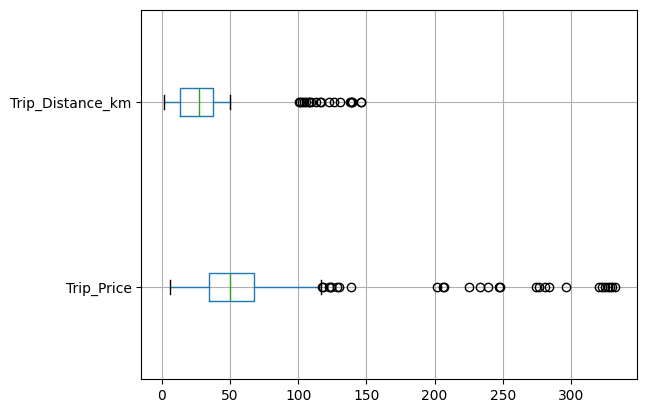

In [19]:
data.select_dtypes(include='number').boxplot(vert=False)
plt.show()


In [20]:
data.describe()

,Trip_Price,Trip_Distance_km
count,1000.000000,1000.000000
mean,56.541560,27.070547
std,39.492129,19.400775
min,6.126900,1.230000
25%,34.578850,13.107500
50%,50.074500,26.995000
75%,67.476650,37.782500
max,332.043689,146.067047


In [44]:
import numpy as np
from scipy import stats

data = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]


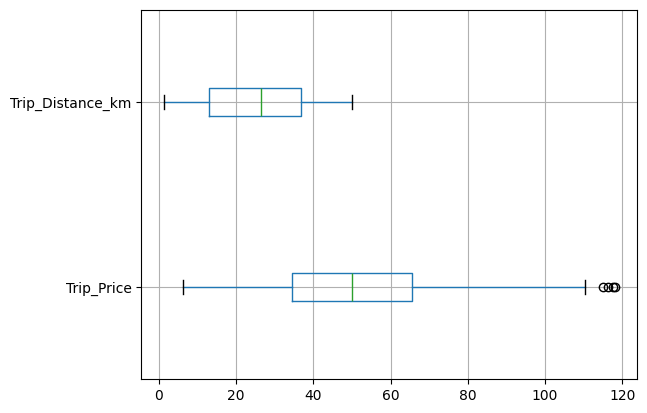

In [47]:
data.select_dtypes(include='number').boxplot(vert=False)
plt.show()

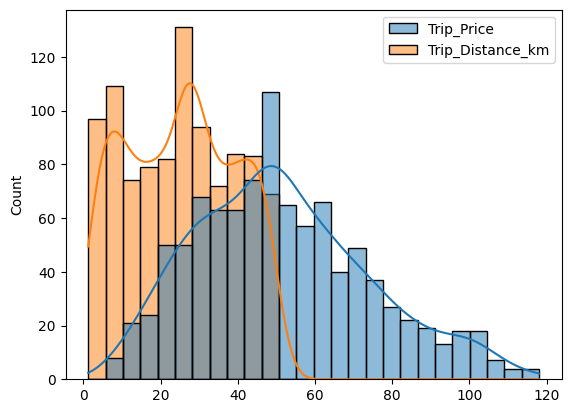

In [ ]:
import seaborn as sns

sns.histplot(data,kde=True)
plt.show()

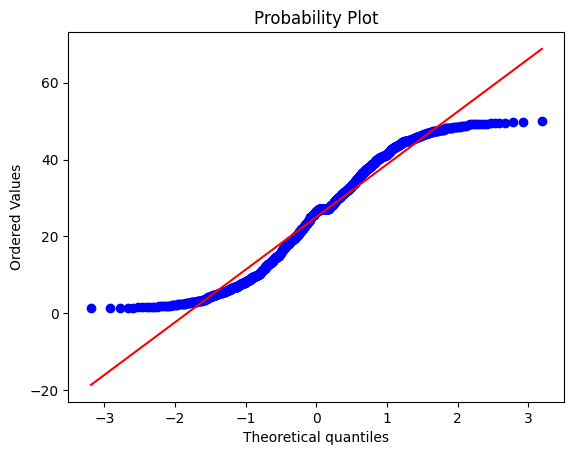

In [50]:
stats.probplot(data['Trip_Distance_km'],dist='norm',plot=plt)
plt.show()

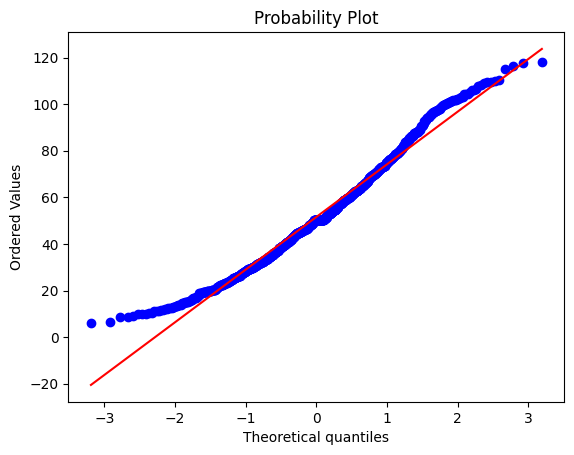

In [51]:
stats.probplot(data['Trip_Price'],dist='norm',plot=plt)
plt.show()

In [54]:
#numercial testing for normality 

from scipy.stats import shapiro

stat, p = shapiro(data['Trip_Price'])
print("p-value:", p)


p-value: 8.841809410399043e-11


In [55]:
Q1 = data['Trip_Price'].quantile(0.25)
Q3 = data['Trip_Price'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

data = data[(data['Trip_Price'] >= lower) & (data['Trip_Price'] <= upper)]


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 970 entries, 0 to 999
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Trip_Price        970 non-null    float64
 1   Trip_Distance_km  970 non-null    float64
dtypes: float64(2)
memory usage: 22.7 KB


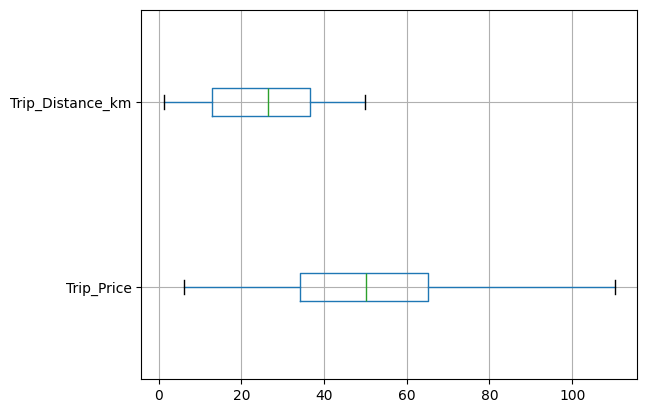

In [57]:
data.select_dtypes(include='number').boxplot(vert=False)
plt.show()

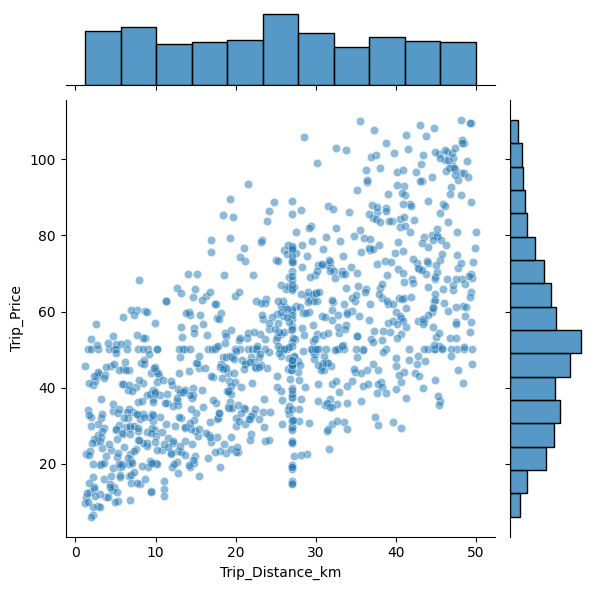

In [58]:
sns.jointplot(x='Trip_Distance_km',y='Trip_Price',data=data,alpha=0.5)
plt.show()

In [71]:
#spliting the data
from sklearn.model_selection import train_test_split

x= data[['Trip_Distance_km']]
y=data['Trip_Price']

In [72]:
X_train,X_test,y_train,y_test =train_test_split(x,y,test_size=0.3,random_state=42)

In [73]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

In [74]:
lr.fit(X_train,y_train)

LinearRegression()

In [78]:
y_predict=lr.predict(X_test)

In [77]:
print(lr.coef_)
print(lr.intercept_)

[1.06907816]
24.75197398601441


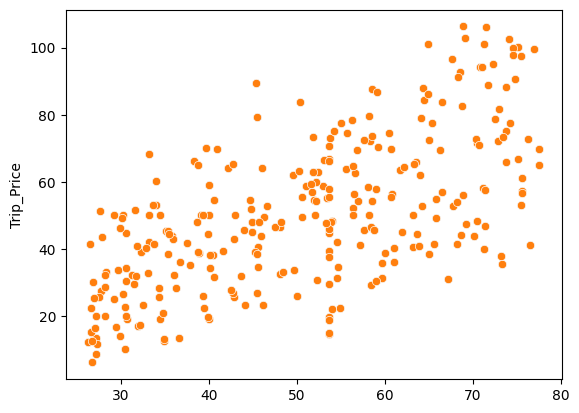

In [80]:
sns.scatterplot(x=y_predict,y=y_test)
plt.show()

In [84]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions
y_pred = lr.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE: 13.89691607337326
MSE: 290.0461356713986
RMSE: 17.030740902010063
R² Score: 0.4142911139746779
